# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [100]:
#python packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import random 

#set seaborn
sns.set()

#load data
df = pd.read_csv('Data/human_temp/data/human_body_temperature.csv')

#get a sense of what the data look like
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [101]:
#summary stats on the data
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


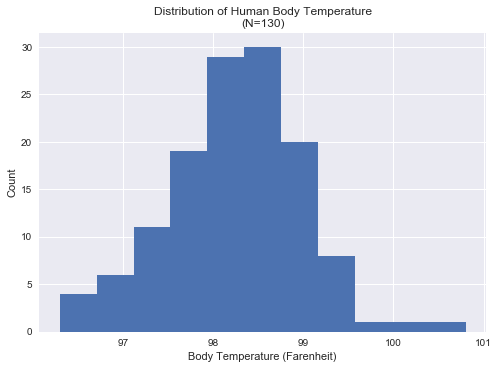

In [102]:
#exploratory data analysis

#plot a histogram
n_bins = int(np.sqrt(130))
_ = plt.hist(df['temperature'], bins=n_bins)
_ = plt.xlabel('Body Temperature (Farenheit)')
_ = plt.ylabel('Count')
_ = plt.title('Distribution of Human Body Temperature\n(N=130)')

# Show histogram
plt.show()

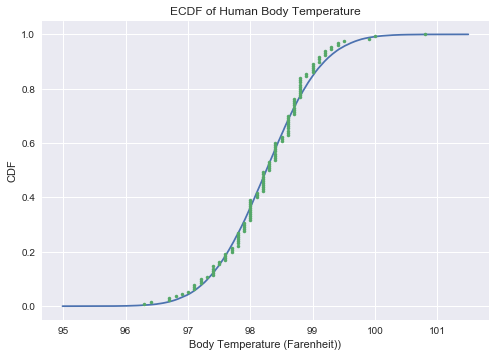

In [103]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

samples = np.random.normal(np.mean(df['temperature']), np.std(df['temperature']), size=100000) 
x,y=ecdf(df['temperature'])
x_hat,y_hat=ecdf(samples)

_ = plt.plot(x_hat, y_hat)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Body Temperature (Farenheit))')
_ = plt.ylabel('CDF')
_ = plt.title('ECDF of Human Body Temperature')
plt.show()

By plotting the empirical CDF against the population CDF (simulated by producing 100,000 random samples with the same mean and standard deviation), I can see that our sample of body temperatures is approximately normal distributed. Because the data were randomly sampled, and assuming that the same person was not sampled twice, the observations are independent. The sample is large enough to draw insight about the mean body temperature. 

The mean temperature of this sample is 98.2, which is .4 less than the estimated population mean of 98.6. To determine whether the mean of our sample is statistically significantly different from the estimated population mean of 98.6 (i.e., to calculate the probability of obtaining a mean of 98.2 if the population mean is actually 98.6), I would do a one sample test, since I am comparing our sample to the postulated population mean. I would use the z statistic, since our sample size is above 30. We see the probability of obtaining a mean of 98.2 if the true population mean was actually 98.6 is very close to zero; therefore I reject my null hypothesis that the population mean is 98.6. 

Since the sample is large (n=130, df=129), the t-test would produce very similar results and my conclusions would not change. This is done below.

In [104]:
def z_test(data):
    mean=np.mean(data['temperature'])
    se=(np.std(data['temperature']))/np.sqrt(len(data['temperature']))
    z = (mean - 98.6)/se
    pval=stats.norm.sf(abs(z))
    return z,pval
    print("Z Test Result (statistic= " + z + ", pvalue= " + pval + ")")

z_test(df)

(-5.4759252020781162, 2.1761575829410943e-08)

In [105]:
stats.ttest_1samp(df['temperature'], 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [114]:
df_sample=df.sample(n=10,random_state=123)

z_test(df_sample)

(-3.0653402401935286, 0.0010871125027541902)

In [115]:
stats.ttest_1samp(df_sample['temperature'], 98.6)

Ttest_1sampResult(statistic=-2.9080370887137508, pvalue=0.017366648131180197)

When the sample size is smaller, we see that the values from the t-test and the z-test are markedly different. In this case, the sample has a T-Distribution and it makes more sense to use the t-statistic to calculate the p-value.

In [119]:
mean=np.mean(df['temperature'])
se=(np.std(df['temperature']))/np.sqrt(len(df['temperature']))
moe=2.58*se
print(mean+moe)
print(mean-moe)
print(moe)

98.4144968351
98.0839647033
0.165266065914


If we were to consider abnormal temperatures as those that fell above or below the mean, we can say that abnormal temperatures would be those that fell outside of our 99% confidence interval of 98.2 +/- .17.

In [131]:
female_df=df[df['gender']=='F']
male_df=df[df['gender']=='M']

print("Male Mean "+str(np.mean(male_df['temperature']))+" Female Mean "+str(np.mean(female_df['temperature'])))

Male Mean 98.1046153846154 Female Mean 98.39384615384613


In [132]:
stats.ttest_ind(female_df['temperature'],male_df['temperature'])

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.023931883122395609)

These results indicate that males and females have statistically significantly different body temperatures.